In [8]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

# Упражнения к главе 8
## Упражнения 8.1 и 8.2
С использованием интерактивного виджета продемонстрировать, что случится с гауссовым окном и его ДПФ при изменении std на том же числе точек.

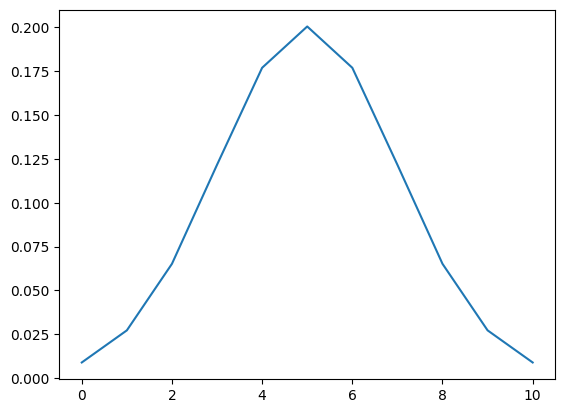

In [23]:
import scipy
from thinkdsp import SquareSignal
import ipywidgets as widgets

def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

def plot_filter(M=11, std=2):
    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    padded = zero_pad(gaussian, 10000)
    dft_gaussian = np.fft.rfft(padded)
    plt.figure()
    plt.plot(np.abs(dft_gaussian))
    plt.show()

def plot_filter_2(M=11, std=2):
    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    plt.figure()
    plt.plot(gaussian)
    plt.show()

plot_filter_2(std=2)

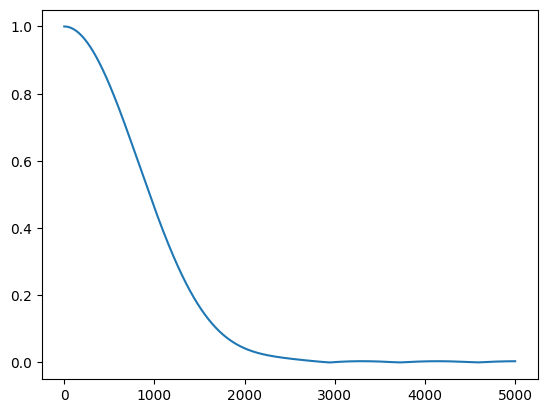

In [24]:
plot_filter(std = 2)

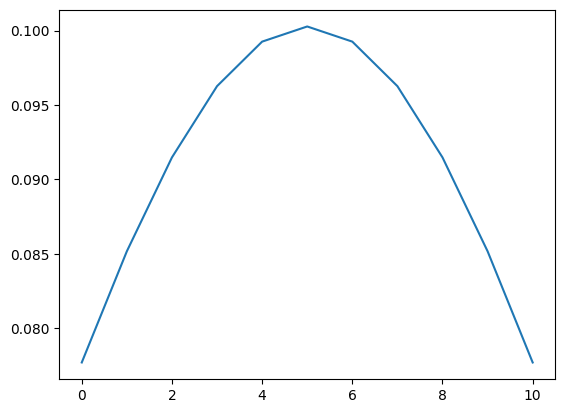

In [15]:
plot_filter_2(std=7)

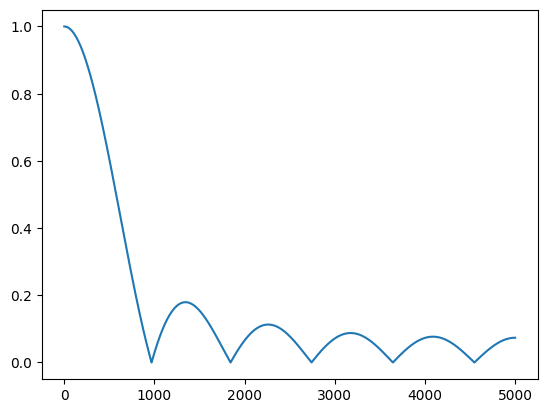

In [25]:
plot_filter(std=7)

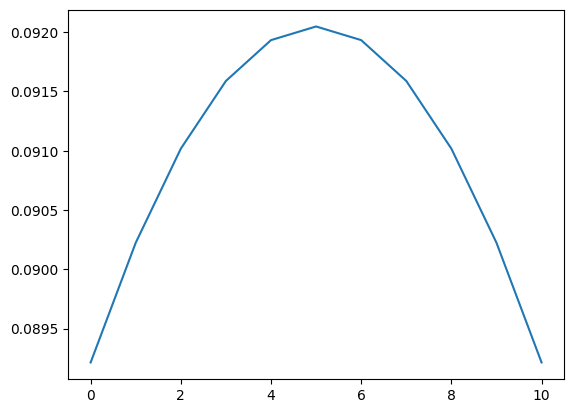

In [20]:
plot_filter_2(std=20)

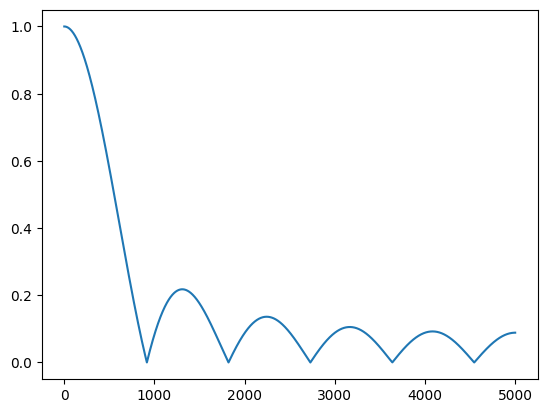

In [26]:
plot_filter(std=20)

При увеличении std окно становится ниже и шире, а ДПФ начинает спадать значительно круче. Если считать, что ДПФ - половина гауссовой кривой, то можно сказать, что его std приблизительно обратно пропорционально std фильтра. При этом из-за дополнения нулями с ростом std фильтра растет высота боковых лепестков.

## Упражнение 8.3
В дополнение к Гауссову окну создать окно Хемминга тех же размеров. Дополнить окно нулями и напечатать его ДПФ. Определить какое окно больше подходит для фильтра НЧ.

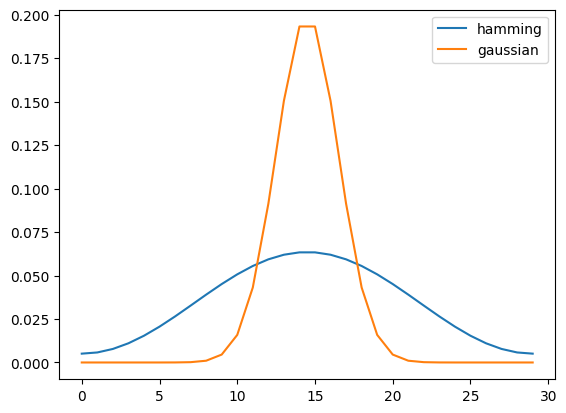

In [27]:
hamming_window = np.hamming(30)
gaussian_window = scipy.signal.windows.gaussian(30, 2)
hamming_window /= sum(hamming_window)
gaussian_window /= sum(gaussian_window)
plt.plot(hamming_window, label="hamming")
plt.plot(gaussian_window, label="gaussian")
plt.legend()
plt.show()

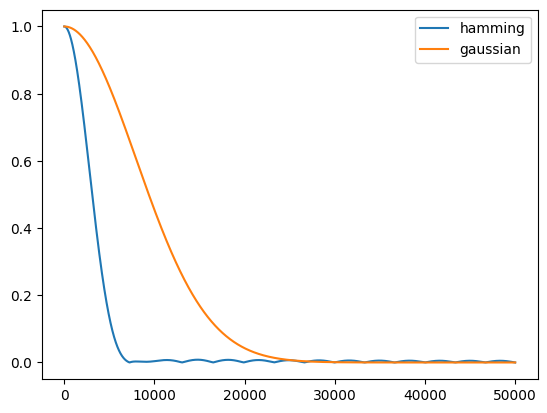

In [31]:
dft_gaussian = np.fft.rfft(zero_pad(gaussian_window, 100000))
dft_hamming = np.fft.rfft(zero_pad(hamming_window, 100000))
plt.plot(np.abs(dft_hamming), label="hamming")
plt.plot(np.abs(dft_gaussian), label="gaussian")
plt.legend()
plt.show()

ДПФ окна Хэмминга спадает значительно резче, однако обладает более вусокими боковыми лепестками. В тех случаях, где это не критично, окно Хэмминга предпочтительнее как НЧ-фильтр.